In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = '37D4EIzLHkrofHjKNfsQFeq4y'
consumerSecret = '404fGNFnFpsIULhIQpXKESh1aVe33Xj2o8ZDQb1uRxexrIcNXe'
accessToken = '1922379596-owUK0H7AdFUZCdNQKdemcQKYb8byvQ3UZdiTyn7'
accessTokenSecret = '6UFaMLxam0iOIaNXHjfItLAzXO8oa4RazYyPIKLuiLEYC'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Hats off to this journalist... https://t.co/PQnXFW2gtn

2) RT @AapKaGopalRai: Delhi: 59 units shift to green fuel in 40 days.
 https://t.co/RJt1OAvhRp

3) RT @SatyendarJain: Our medical staff has played the most important role during COVID. 

From putting their lives at stake to cure others to…

4) RT @abhinandita_m: The Delhi govt has been working hard to make Delhi India's cultural capital. 

Must Watch: @msisodia in conversation wit…

5) बर्ड फ़्लू पर दिल्ली सरकार हर ज़रूरी कदम उठा रही है। घबराने की या चिंता की कोई बात नहीं। स्तिथि पर लगातार नज़र है

अभी तक दिल्ली में एक भी कन्फ़र्म्ड केस नहीं पाया गया

एहतियातन-

आज से जीवित पक्षियों का दिल्ली में आयात बंद

आज से ग़ाज़ीपुर मुर्ग़ा मार्केट दस दिन के लिए बंद https://t.co/B4QZarb6nH



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Hats off to this journalist... https://t.co/PQ...
1,RT @AapKaGopalRai: Delhi: 59 units shift to gr...
2,RT @SatyendarJain: Our medical staff has playe...
3,RT @abhinandita_m: The Delhi govt has been wor...
4,बर्ड फ़्लू पर दिल्ली सरकार हर ज़रूरी कदम उठा र...


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Hats off to this journalist...
1,: Delhi: 59 units shift to green fuel in 40 da...
2,: Our medical staff has played the most import...
3,_m: The Delhi govt has been working hard to ma...
4,बर्ड फ़्लू पर दिल्ली सरकार हर ज़रूरी कदम उठा र...
...,...
95,पंजाब के जो व्यापारी किसानों को संघर्ष में मदद...
96,: Kamal Deep Singh will always be remembered f...
97,: While 60th GoaLiberationDay is celebrated in...
98,उत्तर प्रदेश के राजनीतिक मुद्दों समेत कई और वि...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Hats off to this journalist...,0.000000,0.000000
1,: Delhi: 59 units shift to green fuel in 40 da...,0.300000,-0.200000
2,: Our medical staff has played the most import...,0.500000,0.300000
3,_m: The Delhi govt has been working hard to ma...,0.320833,-0.095833
4,बर्ड फ़्लू पर दिल्ली सरकार हर ज़रूरी कदम उठा र...,0.000000,0.000000
...,...,...,...
95,पंजाब के जो व्यापारी किसानों को संघर्ष में मदद...,0.000000,0.000000
96,: Kamal Deep Singh will always be remembered f...,0.366667,0.125000
97,: While 60th GoaLiberationDay is celebrated in...,0.750000,0.350000
98,उत्तर प्रदेश के राजनीतिक मुद्दों समेत कई और वि...,0.000000,0.000000


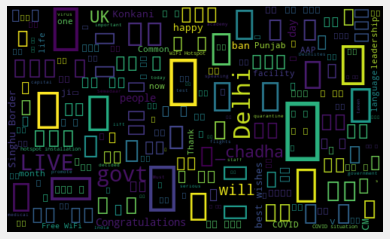

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Hats off to this journalist...,0.000000,0.000000,Neutral
1,: Delhi: 59 units shift to green fuel in 40 da...,0.300000,-0.200000,Negative
2,: Our medical staff has played the most import...,0.500000,0.300000,Positive
3,_m: The Delhi govt has been working hard to ma...,0.320833,-0.095833,Negative
4,बर्ड फ़्लू पर दिल्ली सरकार हर ज़रूरी कदम उठा र...,0.000000,0.000000,Neutral
...,...,...,...,...
95,पंजाब के जो व्यापारी किसानों को संघर्ष में मदद...,0.000000,0.000000,Neutral
96,: Kamal Deep Singh will always be remembered f...,0.366667,0.125000,Positive
97,: While 60th GoaLiberationDay is celebrated in...,0.750000,0.350000,Positive
98,उत्तर प्रदेश के राजनीतिक मुद्दों समेत कई और वि...,0.000000,0.000000,Neutral


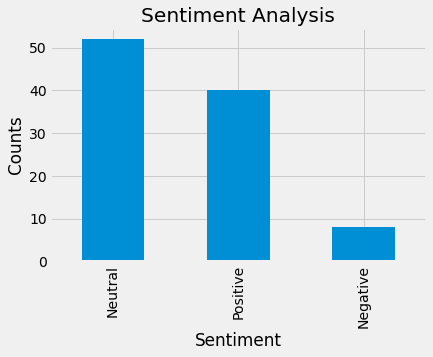

In [10]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()